# Inicio

In [3]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from scipy.stats import normaltest
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

pd.options.mode.chained_assignment = None

from local_libs.color_filter import bcolors as cf
from local_libs.clear_data import clear_data_train

In [4]:
#O arquivo que será trabalhado inicialmente é um arquivo que não apresenta uma limpeza inicial, apenas a categoria "Men"
filtro_men_v01 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQQu1bbmQdZLlrIPIjmM6esYVseTbBa7CiRM4zPyLcvoONYNY985IdqV9hiVlVgXw/pub?output=csv')
filtro_men_v01.sample(5)

,train_id,name,item_condition_id,category_name,sub_category_name,brand_name,price,shipping,item_description,date,stock
82304,1290668,Wood like Sunglasses,1,Men/Men's Accessories/Sunglasses,Men's Accessories,NaN,90,1,"Featuring our ""Woodlike"" sunglasses series. Ge...",15-9-2018,1
64927,1437393,Men's 10.5 Rocky boots,3,Men/Shoes/Boots,Shoes,ROCKY,370,1,"Men's Bean Toe Ride 13"" , brown, Rocky Boots. ...",27-7-2018,18
10067,438545,Men's BKE Jeans,3,Men/Jeans/Boot Cut,Jeans,Buckle,260,0,BKE Jeans size 31R (Regular) Good condition,12-7-2018,3
57615,1439486,Air Jordan 1,1,Men/Shoes/Athletic,Shoes,Jordan,730,0,Mid Jordan ones all black. Look really nice wi...,9-11-2018,16
49344,1119838,Polo Ralph Lauren Dad Hat,3,Men/Men's Accessories/Hats,Men's Accessories,Polo Ralph Lauren,140,0,Distressed Navy Blue with white stitching and ...,8-4-2018,23


In [5]:
filtro_men_v01 = clear_data_train(filtro_men_v01)

e:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-11-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
e:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-10-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
e:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29-10-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
e:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-11-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

In [6]:
filtro_men_v01['price'] /= 10

In [7]:
filtro_men_tops = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Tops']
filtro_men_shoes = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Shoes']
filtro_men_athletic_apparel = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Athletic Apparel']
filtro_men_coats_jackets = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Coats & Jackets']
filtro_men_accessories = filtro_men_v01[filtro_men_v01['sub_category_name'] == "Men's Accessories"]
filtro_men_sweats_hoodies = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Sweats & Hoodies']
filtro_men_shorts = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Shorts']
filtro_men_jeans = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Jeans']
filtro_men_other = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Other']
filtro_men_sweaters = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Sweaters']
filtro_men_pants = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Pants']
filtro_men_swimwear = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Swimwear']
filtro_men_suits = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Suits']
filtro_men_blazers_sport_coats = filtro_men_v01[filtro_men_v01['sub_category_name'] == 'Blazers & Sport Coats']

In [8]:
print(f'Descrição do preço da subcategoria {cf.BOLD}Blazers & Sport Coats{cf.ENDC}:')
filtro_men_blazers_sport_coats['price'].describe()

Descrição do preço da subcategoria Blazers & Sport Coats:


count    69.000000
mean     27.463768
std      16.416974
min       3.000000
25%      16.000000
50%      24.000000
75%      34.000000
max      95.000000
Name: price, dtype: float64

In [9]:
print(f'Descrição do preço da subcategoria {cf.BOLD}Suits{cf.ENDC}:')
filtro_men_suits['price'].describe()

Descrição do preço da subcategoria Suits:


count     66.000000
mean      37.151515
std       26.221097
min        6.000000
25%       21.000000
50%       30.000000
75%       43.750000
max      175.000000
Name: price, dtype: float64

In [10]:
print(f'Descrição do preço da subcategoria {cf.BOLD}Swimwear{cf.ENDC}:')
filtro_men_swimwear['price'].describe()

Descrição do preço da subcategoria Swimwear:


count    504.000000
mean      15.980159
std        8.423413
min        3.000000
25%       10.000000
50%       14.000000
75%       20.000000
max       70.000000
Name: price, dtype: float64

In [11]:
print(f'Descrição do preço da subcategoria {cf.BOLD}Pants{cf.ENDC}:')
filtro_men_pants['price'].describe()

Descrição do preço da subcategoria Pants:


count    903.000000
mean      19.657807
std       13.292015
min        4.000000
25%       12.000000
50%       16.000000
75%       22.000000
max      156.000000
Name: price, dtype: float64

In [12]:
print(f'Descrição do preço da subcategoria {cf.BOLD}Jeans{cf.ENDC}:')
filtro_men_jeans['price'].describe()

Descrição do preço da subcategoria Jeans:


count    3786.000000
mean       28.540148
std        23.229817
min         4.000000
25%        15.000000
50%        21.000000
75%        35.000000
max       415.000000
Name: price, dtype: float64

In [13]:
print(f'Descrição do preço da subcategoria {cf.BOLD}Shorts{cf.ENDC}:')
filtro_men_shorts['price'].describe()

Descrição do preço da subcategoria Shorts:


count    1465.000000
mean       18.503072
std        15.435576
min         3.000000
25%        10.000000
50%        14.000000
75%        21.000000
max       250.000000
Name: price, dtype: float64

In [14]:
print(f'Descrição do preço da subcategoria {cf.BOLD}Sweats & Hoodies{cf.ENDC}:')
filtro_men_sweats_hoodies['price'].describe()

Descrição do preço da subcategoria Sweats & Hoodies:


count    8270.000000
mean       27.648609
std        24.211240
min         3.000000
25%        15.000000
50%        21.000000
75%        31.000000
max       426.000000
Name: price, dtype: float64

In [15]:
print(f'Descrição do preço da subcategoria {cf.BOLD}Sweaters{cf.ENDC}:')
filtro_men_sweaters['price'].describe()

Descrição do preço da subcategoria Sweaters:


count    1440.000000
mean       21.229861
std        15.210109
min         3.000000
25%        14.000000
50%        18.000000
75%        25.000000
max       200.000000
Name: price, dtype: float64

In [16]:
print(f'Descrição do preço da subcategoria {cf.BOLD}Coats & Jackets{cf.ENDC}:')
filtro_men_coats_jackets['price'].describe()

Descrição do preço da subcategoria Coats & Jackets:


count    3303.000000
mean       34.579776
std        28.238046
min         3.000000
25%        19.000000
50%        26.000000
75%        41.000000
max       380.000000
Name: price, dtype: float64

In [17]:
print(f'Descrição do preço da subcategoria {cf.BOLD}Other{cf.ENDC}:') 
filtro_men_other['price'].describe()

Descrição do preço da subcategoria Other:


count    870.000000
mean      23.206897
std       29.249940
min        3.000000
25%       10.000000
50%       16.000000
75%       25.000000
max      406.000000
Name: price, dtype: float64

In [18]:
print(f'Descrição do preço da subcategoria {cf.BOLD}Shoes{cf.ENDC}:') 
filtro_men_shoes['price'].describe()

Descrição do preço da subcategoria Shoes:


count    22780.000000
mean        61.737094
std         57.124486
min          3.000000
25%         26.000000
50%         44.000000
75%         76.000000
max        950.000000
Name: price, dtype: float64

In [19]:
print(f"Descrição do preço da subcategoria {cf.BOLD}Men's Accessories{cf.ENDC}:") 
filtro_men_accessories['price'].describe()

Descrição do preço da subcategoria Men's Accessories:


count    18659.000000
mean        33.837478
std         45.061693
min          3.000000
25%         12.000000
50%         20.000000
75%         39.000000
max       1309.000000
Name: price, dtype: float64

In [20]:
print(f"Descrição do preço da subcategoria {cf.BOLD}Athletic Apparel{cf.ENDC}:") 
filtro_men_athletic_apparel['price'].describe()

Descrição do preço da subcategoria Athletic Apparel:


count    10919.000000
mean        24.141130
std         21.395001
min          3.000000
25%         13.000000
50%         19.000000
75%         30.000000
max        855.000000
Name: price, dtype: float64

# Teste Regressão com todas as variáveis

In [21]:
df = filtro_men_v01.copy()
df = pd.get_dummies(df,columns=['sub_category_name','brand_name'])
df.head(3)

,name,item_condition_id,category_name,price,shipping,item_description,date,stock,date2,day,...,brand_name_ethika,brand_name_etnies,brand_name_frogg toggs,brand_name_lululemon athletica,brand_name_papi,brand_name_patagonia,brand_name_prAna,brand_name_rag & bone,brand_name_rue,brand_name_vineyard vines
0,Ralph Lauren Blake Shirt L,3,Men/Tops/Button-Front,18.0,1,"No damage, light aqua, flat chest 27"".",14-5-2018,12,2018-05-14,14,...,0,0,0,0,0,0,0,0,0,0
1,Air Jordan carmine 6s,3,Men/Shoes/Athletic,66.0,0,They are 100 percent authentic. They are beate...,17-5-2018,34,2018-05-17,17,...,0,0,0,0,0,0,0,0,0,0
2,LOOSE COUPE LACHE/SUELTO,2,Men/Athletic Apparel/Competitive Swimwear,17.0,0,ANDER ARMUR,19-4-2018,31,2018-04-19,19,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93609 entries, 0 to 93679
Columns: 1228 entries, name to brand_name_vineyard vines
dtypes: datetime64[ns](1), float64(1), int64(6), object(4), uint8(1216)
memory usage: 117.8+ MB


In [23]:
X = df.drop(['name','item_description','price','date2','date','year','category_name'],axis=1)
y = df.price

In [24]:
X = sm.add_constant(X)
modelo = sm.OLS(exog=X, endog=y)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     41.63
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:47:43   Log-Likelihood:            -4.6051e+05
No. Observations:               93609   AIC:                         9.235e+05
Df Residuals:                   92389   BIC:                         9.350e+05
Df Model:                        1219                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

# Teste Regressão sem brand_name

In [25]:
df02 = filtro_men_v01.copy()
df02 = pd.get_dummies(df02,columns=['sub_category_name'])

In [26]:
X1 = df02.drop(['name','item_description','price','date2','date','year','category_name','brand_name','day','month','stock'],axis=1)
y1 = df02.price

In [27]:
X1 = sm.add_constant(X1)
modelo02 = sm.OLS(exog=X1, endog=y1)
resultado02 = modelo02.fit()
print(resultado02.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     1390.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:48:03   Log-Likelihood:            -4.7159e+05
No. Observations:               93609   AIC:                         9.432e+05
Df Residuals:                   93593   BIC:                         9.434e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

# Teste 03 preços ate 200

In [28]:
df03 = filtro_men_v01[filtro_men_v01['price'] <= 200]
df03 = pd.get_dummies(df03,columns=['sub_category_name','brand_name'])

In [29]:
df03.shape

(92613, 1223)

In [30]:
X03 = df03.drop(['name','item_description','price','date2','date','year','category_name','stock','day','month'],axis=1)
y03 = df03.price

In [31]:
X03 = sm.add_constant(X03)
modelo03 = sm.OLS(exog=X03, endog=y03)
resultado03 = modelo03.fit()
print(resultado03.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     53.21
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:48:19   Log-Likelihood:            -4.2347e+05
No. Observations:               92613   AIC:                         8.494e+05
Df Residuals:                   91401   BIC:                         8.608e+05
Df Model:                        1211                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

# Fim

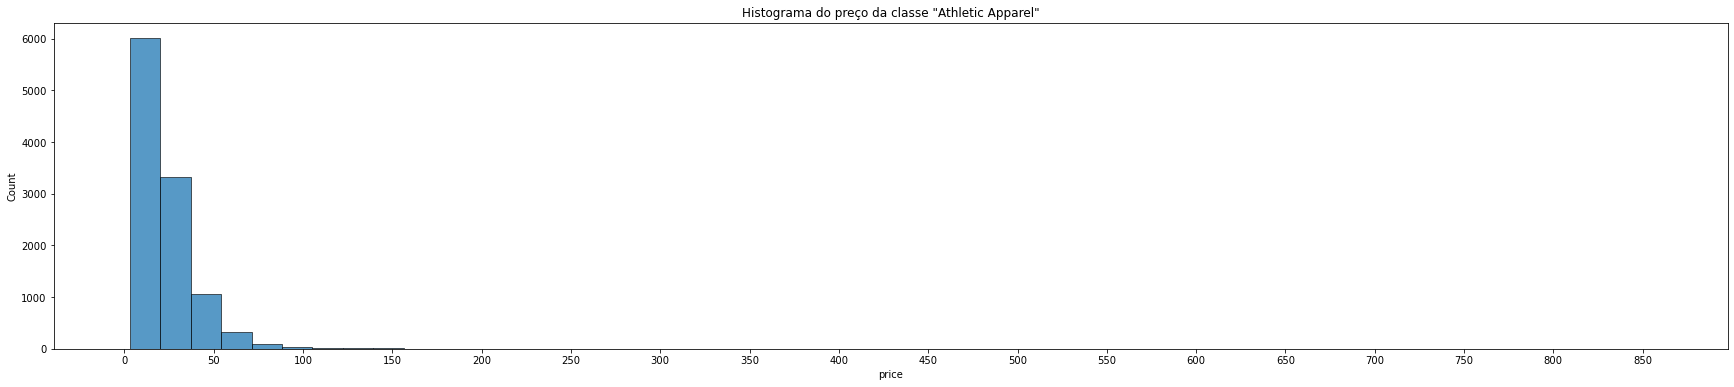

In [32]:
grafico_athletic_apparel = sns.histplot(filtro_men_athletic_apparel['price'],bins=50)
grafico_athletic_apparel.set_xticks(range(0,855,50))
grafico_athletic_apparel.set_title('Histograma do preço da classe "Athletic Apparel"')
grafico_athletic_apparel.figure.set_size_inches(30,6)

In [33]:
filtro_men_tops['price'].describe()

count    20575.000000
mean        19.014216
std         17.317201
min          3.000000
25%         10.000000
50%         14.000000
75%         21.000000
max        375.000000
Name: price, dtype: float64

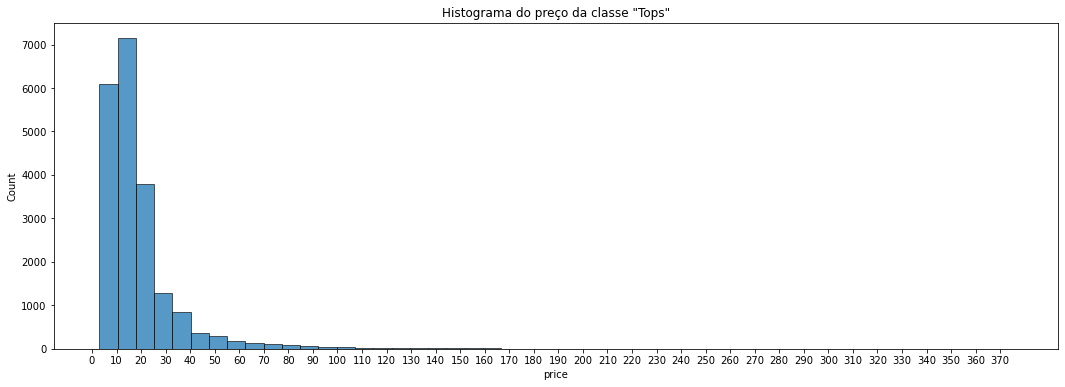

In [34]:
grafico_tops = sns.histplot(filtro_men_tops['price'],bins=50)
grafico_tops.set_xticks(range(0,375,10))
grafico_tops.set_title('Histograma do preço da classe "Tops"')
grafico_tops.figure.set_size_inches(18,6)

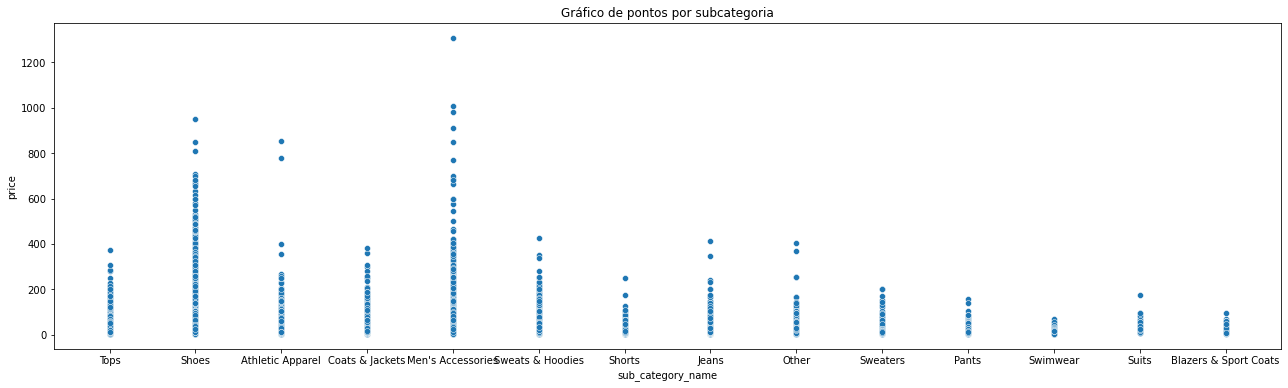

In [35]:
grafico =  sns.scatterplot(x='sub_category_name',y='price',data=filtro_men_v01)
grafico.set_title('Gráfico de pontos por subcategoria')
grafico.figure.set_size_inches(22,6)

In [36]:
filtro = filtro_men_v01[filtro_men_v01['price']<=200]

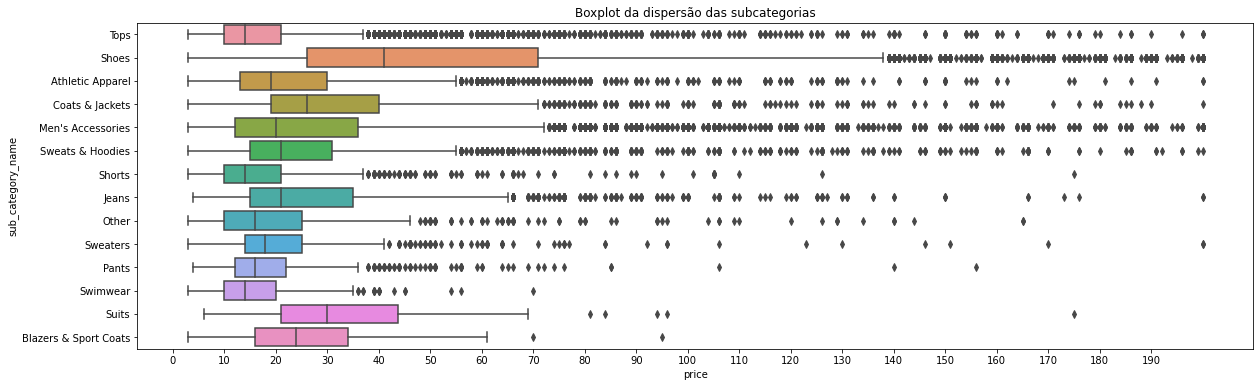

In [37]:
boxplot = sns.boxplot(x='price',y='sub_category_name',data=filtro)
boxplot.set_title('Boxplot da dispersão das subcategorias')
boxplot.set_xticks(range(0,200,10))
boxplot.figure.set_size_inches(20,6)

In [38]:
novo_filtro = filtro[(filtro['sub_category_name'] == 'Tops') | (filtro['sub_category_name'] == 'Shorts') | (filtro['sub_category_name'] == 'Swimwear')]

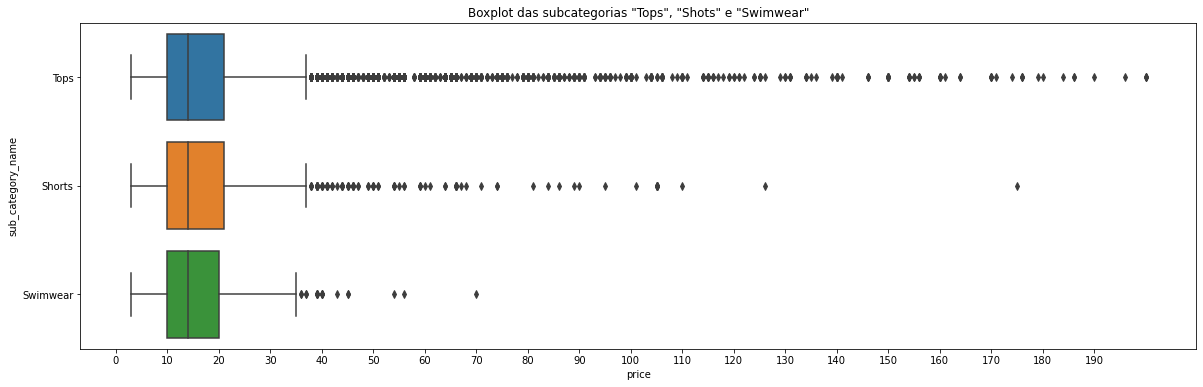

In [39]:
boxplot = sns.boxplot(x='price',y='sub_category_name',data=novo_filtro)
boxplot.set_title('Boxplot das subcategorias "Tops", "Shots" e "Swimwear"')
boxplot.set_xticks(range(0,200,10))
boxplot.figure.set_size_inches(20,6)

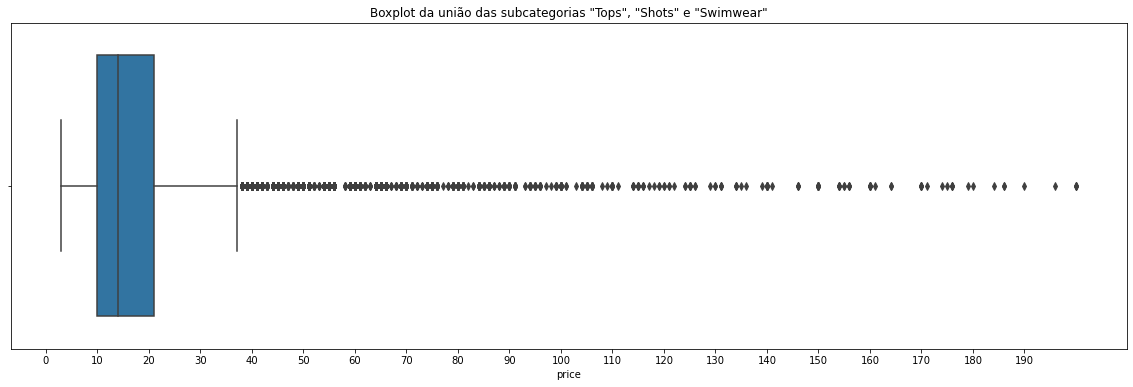

In [40]:
boxplot = sns.boxplot(x='price',data=novo_filtro)
boxplot.set_title('Boxplot da união das subcategorias "Tops", "Shots" e "Swimwear"')
boxplot.set_xticks(range(0,200,10))
boxplot.figure.set_size_inches(20,6)

In [41]:
filtro_men_v01.value_counts(filtro_men_v01['sub_category_name'])

sub_category_name
Shoes                    22780
Tops                     20575
Men's Accessories        18659
Athletic Apparel         10919
Sweats & Hoodies          8270
Jeans                     3786
Coats & Jackets           3303
Shorts                    1465
Sweaters                  1440
Pants                      903
Other                      870
Swimwear                   504
Blazers & Sport Coats       69
Suits                       66
dtype: int64

In [42]:
novo_filtro.value_counts(novo_filtro['sub_category_name'])

sub_category_name
Tops        20563
Shorts       1464
Swimwear      504
dtype: int64

# Testando com apenas duas brand_name

In [43]:
df = filtro_men_v01.copy()

In [44]:
#Função responsável por transformar a coluna em binário
def change_brand_name(df):
  df.reset_index(drop= True, inplace= True)
  for i in range(len(df)):
    if df['brand_name'][i] == 'Other':
      df.loc[i , 'brand_name'] = 'sem_marca'
    else:
      df.loc[i , 'brand_name'] = 'com_marca'
  return df

df = change_brand_name(df)

In [45]:
df.value_counts('brand_name')

brand_name
com_marca    70496
sem_marca    23113
dtype: int64

In [46]:
df = pd.get_dummies(df,columns=['sub_category_name','brand_name'])
df.sample(5)

,name,item_condition_id,category_name,price,shipping,item_description,date,stock,date2,day,...,sub_category_name_Pants,sub_category_name_Shoes,sub_category_name_Shorts,sub_category_name_Suits,sub_category_name_Sweaters,sub_category_name_Sweats & Hoodies,sub_category_name_Swimwear,sub_category_name_Tops,brand_name_com_marca,brand_name_sem_marca
87269,Coogi Card Wallet,2,Men/Men's Accessories/Wallets,10.0,1,Coogi Card Wallet new in the box.,11-3-2018,1,2018-11-03,3,...,0,0,0,0,0,0,0,0,0,1
49521,New air max,1,Men/Shoes/Athletic,76.0,0,New No box Men's size 10.5,15-3-2018,9,2018-03-15,15,...,0,1,0,0,0,0,0,0,1,0
15068,Louis Vuitton Belt Bundle ALL 4,1,Men/Men's Accessories/Belts,131.0,0,●PURCHASE & IN MESSAGE SECTION STATE COLOR & S...,17-8-2018,15,2018-08-17,17,...,0,0,0,0,0,0,0,0,1,0
79928,Mens Nike dri fit running shorts,2,Men/Athletic Apparel/Shorts,13.0,1,Perfect condition size medium,12-7-2018,19,2018-12-07,7,...,0,0,0,0,0,0,0,0,1,0
91659,Adidas Men's Joggers,2,Men/Sweats & Hoodies/Track & Sweat Pants,36.0,0,In great condition.,8-3-2018,20,2018-08-03,3,...,0,0,0,0,0,1,0,0,1,0


In [47]:
X = df.drop(['name','item_description','price','date2','date','year','category_name','month','day','stock'],axis=1)
y = df.price

In [48]:
X = sm.add_constant(X)
modelo = sm.OLS(exog=X, endog=y)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     1380.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:48:29   Log-Likelihood:            -4.7109e+05
No. Observations:               93609   AIC:                         9.422e+05
Df Residuals:                   93592   BIC:                         9.424e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

# Brand_name filtradas


In [49]:
filtro_men_v02 = pd.read_csv('https://raw.githubusercontent.com/AugustoCRX/bootcamp_blue/main/novos_arquivos_treino/Limpeza%20v2/filtro_Man_train_v2.csv')

In [50]:
filtro_men_v02.shape

(62569, 16)

In [51]:
# colocando todas as marcas em minusculo
def colunms_to_lower(df,coluna):
  df[coluna] = df[coluna].str.lower()

# para unificar as marcas que por ventura tenham alguma variação.
def unique_brands(df,coluna):
  all_brands = df[coluna].unique()
  for val in all_brands:
    filter = df[df[coluna].str.contains(pat = ' '+val+' ')][coluna]
    if filter.describe()[1] > 1:
      index_filter = filter.index
      for j in range(len(index_filter)):
        df.loc[index_filter[j],coluna] = val

# para unificar as marcas novamente que por ventura não tenham sido unificadas anteriormente.
def unique_brands2(df,coluna):
  all_brands = df[coluna].unique()
  for val in all_brands:
    filter = df[df[coluna].str.contains(pat = val,regex=False)][coluna]
    if filter.describe()[1] > 1:
      index_filter = filter.index
      for j in range(len(index_filter)):
        df.loc[index_filter[j],coluna] = val


# CRIANDO COLUNA NOVA - "brands filter"
# transformar as marcas com menos de x repetições em 'outras' marcas
def brands_to_other(df,coluna_antiga,coluna_nova,numero_corte):
    df_value_counts = df[coluna_antiga].value_counts().to_frame()
    df_value_counts = df_value_counts[df_value_counts[coluna_antiga]<(numero_corte)].reset_index()
    df[coluna_nova] =  df[coluna_antiga]
    for i in range(len(df_value_counts)):
        df[coluna_nova] =  df[coluna_nova].replace(df_value_counts.loc[i,'index'],'other')
    return df.head()

# chamando todas as funções acima
def call_all(df,coluna,nova_coluna,número_corte):
  colunms_to_lower(df,coluna)
  unique_brands(df,coluna)
  brands_to_other(df,coluna,nova_coluna,número_corte)

call_all(filtro_men_v02,'brand_name','brands_filter', 50)

# aplicando a função para união de marcas novamente
unique_brands2(filtro_men_v02,'brands_filter')

# subdividindo a marca 'outros' em 5 grupos de marcas
def filtros_brand_other(df):
  filter_brand_other = df[df['brands_filter']=='other']
  basics_brand = filter_brand_other[filter_brand_other['price']<10]  #basic
  popular_brand = filter_brand_other.loc[(filter_brand_other['price']>=10 ) & (filter_brand_other['price']<25)] #popular
  upper_pop_brand = filter_brand_other.loc[(filter_brand_other['price']>=25 ) & (filter_brand_other['price']<50)] #upper_popular
  intermediary_brand = filter_brand_other.loc[(filter_brand_other['price']>=50 ) & (filter_brand_other['price']<500)] #intermediary
  luxury_brand = filter_brand_other[filter_brand_other['price']>=500]  #luxury

  def loop_brand_filters(df,filtro,nome_filtro):
     for val1 in filtro.index:
        df.loc[val1,'brands_filter'] = nome_filtro

  loop_brand_filters(df,basics_brand,'basics_brand')
  loop_brand_filters(df,popular_brand,'popular_brand')
  loop_brand_filters(df,upper_pop_brand,'upper_pop_brand')
  loop_brand_filters(df,intermediary_brand,'intermediary_brand')
  loop_brand_filters(df,luxury_brand,'luxury_brand')

  df = df.reset_index(drop=True)

filtros_brand_other(filtro_men_v02)

In [52]:
filtro_men_v02['brands_filter'].value_counts()

popular_brand      10430
nike                9028
upper_pop_brand     4695
jordan              3752
basics_brand        3203
                   ...  
fila                  58
dr. martens           56
j. crew               51
the hundreds          51
billabong             50
Name: brands_filter, Length: 105, dtype: int64

In [53]:
filtro_men_v02.sample(2)

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,date,stock,date2,day,month,year,description_clear,name_clear,brands_filter
29880,White nike visor,3,Men/Men's Accessories/Hats,other,16.0,1,Cheap,24-1-2018,5,2018-01-24,24,1,2018,cheap,white nike visor,popular_brand
28497,True Religion NWT graphic t men's small,1,Men/Tops/T-shirts,true religion brand jeans,34.0,0,No description yet,16-10-2018,18,2018-10-16,16,10,2018,descript yet,true religion nwt graphic men 's small,true religion


In [54]:
filtro_men_v02.price.describe()

count    62569.000000
mean        36.978871
std         42.794344
min          3.000000
25%         14.000000
50%         24.000000
75%         41.000000
max       1309.000000
Name: price, dtype: float64

In [55]:
filtro_men_v02.shape[0]

62569

In [56]:
def add_second_cat_column(cat_column):
    elements = cat_column.str.split('/')
    level = 1
    category_list = []

    for i in range(len(elements)):
        element = elements[i][level]
        category_list.append(element)

    category_list = np.array(category_list)

    return category_list

filtro_men_v02['sub_category_name'] = add_second_cat_column(filtro_men_v02['category_name'])

In [57]:
filtro_men = pd.get_dummies(filtro_men_v02, columns=['sub_category_name','brands_filter'])


In [58]:
X = filtro_men.drop(['name','category_name','item_description','date','stock','date2','day','month','year','stock','price','brand_name','description_clear','name_clear'],axis=1)
y = filtro_men.price
X = sm.add_constant(X)
rl = sm.OLS(exog=X,endog=y)
result = rl.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     374.9
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:48:57   Log-Likelihood:            -3.0695e+05
No. Observations:               62569   AIC:                         6.141e+05
Df Residuals:                   62449   BIC:                         6.152e+05
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

# Teste Com Prteços ate 150 dolares

In [59]:
filtro_men_ajustado = filtro_men[filtro_men['price'] <= 150]

In [60]:
filtro_men_ajustado.shape[0]

60773

In [61]:
X1 = filtro_men_ajustado.drop(['name','category_name','item_description','date','stock','date2','day','month','year','stock','price','brand_name','description_clear','name_clear'],axis=1)
y1 = filtro_men_ajustado.price
X1 = sm.add_constant(X1)
rl1 = sm.OLS(exog=X1,endog=y1)
result1 = rl1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     520.0
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:48:58   Log-Likelihood:            -2.6411e+05
No. Observations:               60773   AIC:                         5.285e+05
Df Residuals:                   60653   BIC:                         5.295e+05
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------